In [294]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Creating two bivariate normal distributions.

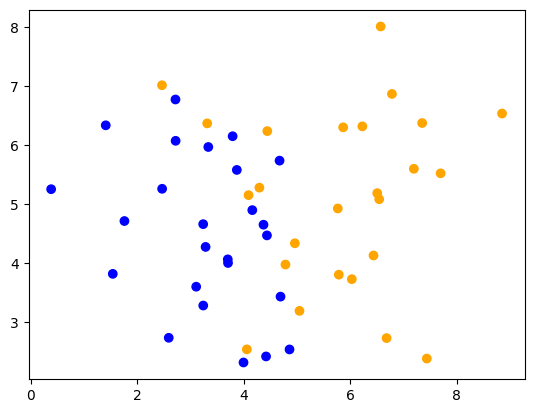

In [295]:
center1 = [3,5]
std1 = 1.5

center2 = [6,5]
std2 = 1.5

data, labels = make_blobs(n_samples=50, centers=[center1, center2], cluster_std=[std1, std2])

colors = np.where(labels == 0, 'blue', 'orange') 

plt.scatter(data[:, 0], data[:, 1], c=colors)
plt.show()


# Plot the Bayes Decision Boundary

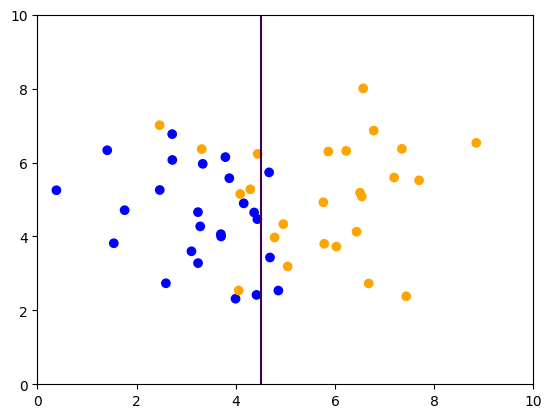

In [296]:
dist1 = multivariate_normal(center1,std1)
dist2 = multivariate_normal(center2,std2)

x, y = np.meshgrid(np.linspace(0, 10, 50), np.linspace(0, 10, 50))
pos = np.dstack((x, y))

pdf1 = dist1.pdf(pos)
pdf2 = dist2.pdf(pos)
plt.contour(x, y, pdf1 - pdf2, levels=[0])
plt.scatter(data[:, 0], data[:, 1], c=colors)
plt.show()


# Results of 5NN

In [297]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(data,labels)

y_hat_knn = knn.predict(data)
acc_knn = accuracy_score(labels,y_hat_knn)

y_hat_bdb = []
for i in data:
    if dist1.pdf(i) > dist2.pdf(i): y_hat_bdb.append(0)
    else : y_hat_bdb.append(1)

acc_bdb = accuracy_score(labels,y_hat_bdb)

print(f'5NN accuracy: {acc_knn}, BDB accuracy: {acc_bdb}')

5NN accuracy: 0.8, BDB accuracy: 0.82


# Plotting KNN

In [298]:
def plot_knn(data,labels,n_neighbours, scatter= True):
    knn = KNeighborsClassifier(n_neighbors=n_neighbours)
    knn.fit(data,labels)

    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    colors = np.where(labels == 0, 'blue', 'orange') 

    plt.contourf(xx, yy, Z, alpha=0.3)
    if scatter:
        plt.scatter(data[:, 0], data[:, 1], c=colors)

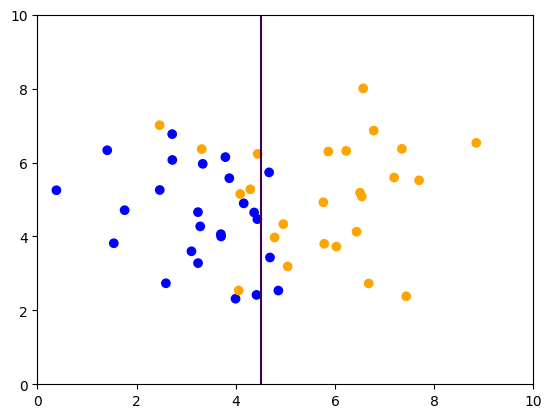

In [299]:
plt.contour(x, y, pdf1 - pdf2, levels=[0])
plt.scatter(data[:, 0], data[:, 1], c=colors)
plt.show()

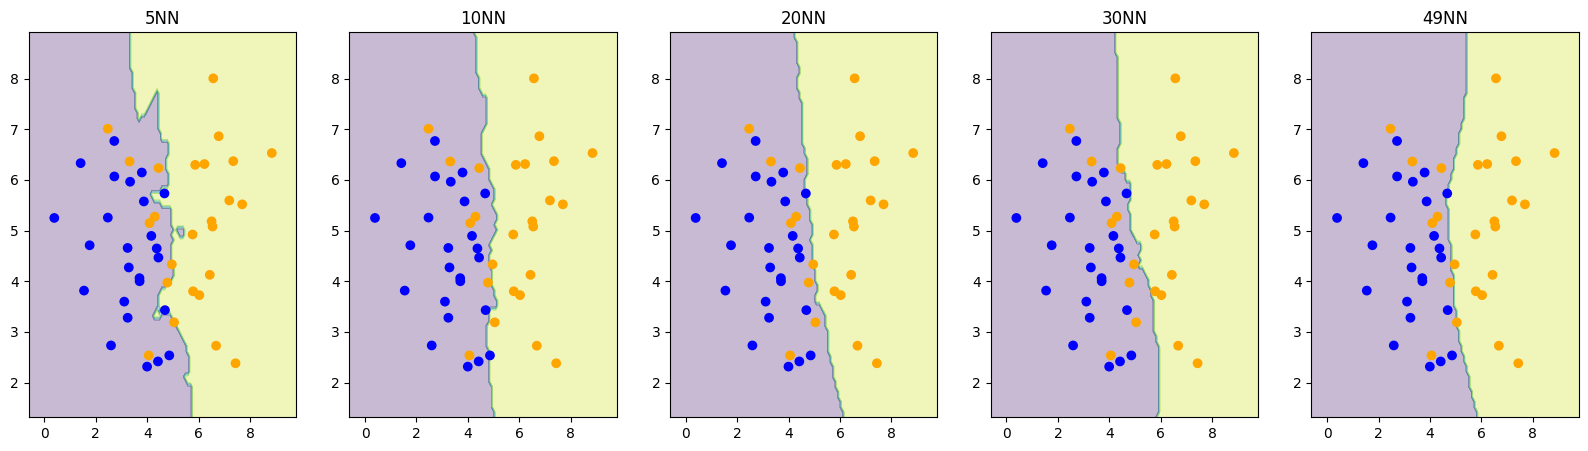

In [300]:
plt.figure(figsize=(20,5))

plt.subplot(1,5,1)
plot_knn(data,labels,5)
plt.title('5NN')

plt.subplot(1,5,2)
plot_knn(data,labels,10)
plt.title('10NN')

plt.subplot(1,5,3)
plot_knn(data,labels,20)
plt.title('20NN')

plt.subplot(1,5,4)
plot_knn(data,labels,30)
plt.title('30NN')

plt.subplot(1,5,5)
plot_knn(data,labels,49)
plt.title('49NN')

plt.show()

# Changing sample size

In [301]:
def make_data(n_samples):

    center1 = [3,5]
    std1 = 1.5

    center2 = [6,5]
    std2 = 1.5

    data, labels = make_blobs(n_samples=n_samples, centers=[center1, center2], cluster_std=[std1, std2])
    return data, labels

def plot_data(data,labels,n_samples):
    colors = np.where(labels == 0, 'blue', 'orange') 

    dist1 = multivariate_normal(center1,std1)
    dist2 = multivariate_normal(center2,std2)

    x, y = np.meshgrid(np.linspace(0, 10, n_samples), np.linspace(0, 10, n_samples))
    pos = np.dstack((x, y))

    pdf1 = dist1.pdf(pos)
    pdf2 = dist2.pdf(pos)
    plt.contour(x, y, pdf1 - pdf2, levels=[0])
    plt.scatter(data[:, 0], data[:, 1], c=colors)


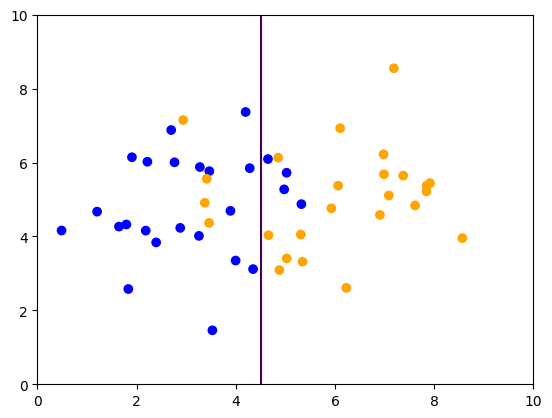

In [302]:
data,labels= make_data(50)
plot_data(data,labels,50)


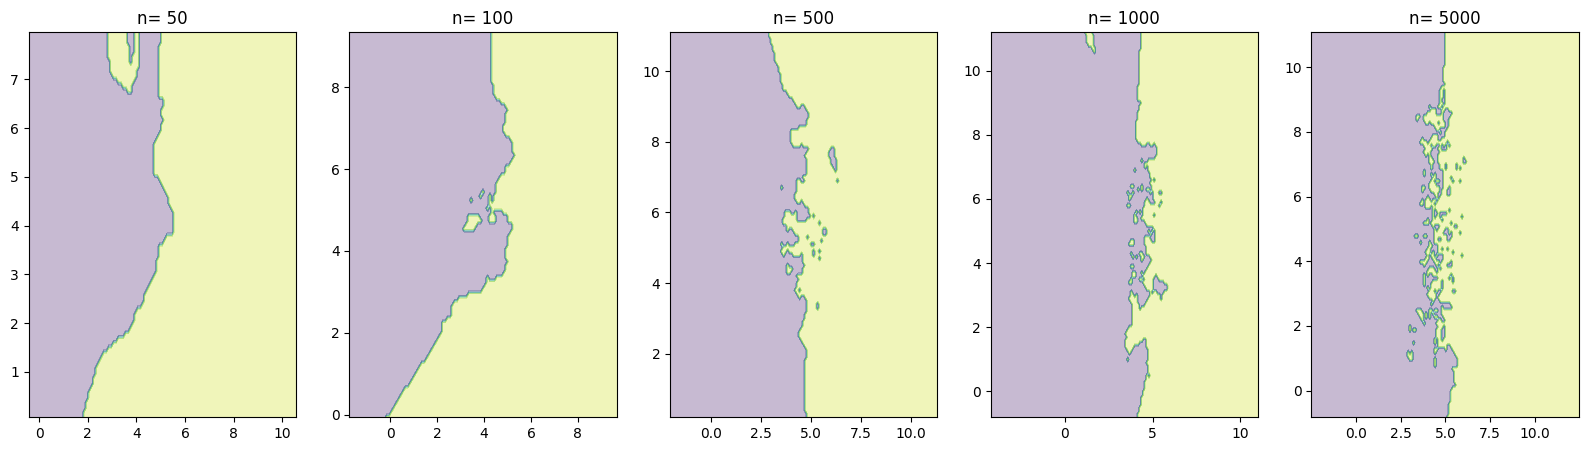

In [303]:
plt.figure(figsize=(20,5))

plt.subplot(1,5,1)
data,labels= make_data(50)
plot_knn(data,labels,5,False)
plt.title('n= 50')

plt.subplot(1,5,2)
data,labels= make_data(100)
plot_knn(data,labels,5,False)
plt.title('n= 100')

plt.subplot(1,5,3)
data,labels= make_data(500)
plot_knn(data,labels,5,False)
plt.title('n= 500')

plt.subplot(1,5,4)
data,labels= make_data(1000)
plot_knn(data,labels,5,False)
plt.title('n= 1000')

plt.subplot(1,5,5)
data,labels= make_data(5000)
plot_knn(data,labels,5,False)
plt.title('n= 5000')

plt.show()